#**Project Name -FedEx Logistics Performance Analysis**

**Project Type** - EDA

**Contribution** - Individual

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

FedEx Logistics operates a large-scale, global supply chain that handles thousands of shipments across multiple regions, countries, transportation modes, and vendor agreements. With the rapid growth of e-commerce and international trade, the complexity of managing purchase orders, shipment methods, delivery timelines, and freight costs has increased significantly.

Despite advanced logistics infrastructure, challenges such as delivery delays, inefficient shipment methods, cost overruns, and vendor-related bottlenecks can negatively impact operational efficiency and customer satisfaction. Small inefficiencies at any stage of the logistics process—order processing, transportation selection, or vendor compliance—can lead to higher freight costs and missed delivery commitments.

The key business problem is to identify inefficiencies and performance gaps within the logistics operations by analyzing historical shipment data. FedEx aims to understand where delays occur, which shipment modes or regions incur higher costs, and how vendor agreements (INCO terms) influence delivery performance.

#### **Define Your Business Objective?**

Identify delays and bottlenecks in the shipment process

Compare the performance of different shipment modes (air, sea, road, etc.)

Analyze freight cost variations across regions and shipment types

Evaluate the impact of vendor agreements (INCO terms) on delivery efficiency

Support data-driven decision-making to optimize logistics operations

# **General Guidelines** : -  

The notebook should be well-structured, properly formatted, and fully commented to ensure clarity and readability.

The entire .ipynb file must be deployment-ready, meaning it should execute completely in one single run without any errors.

All libraries should be imported at the beginning, and unnecessary or experimental code must be removed.

Basic exception handling and robust coding practices are encouraged and will be considered for additional credit.

Data Analysis & Visualization Approach

Perform analysis in a structured manner following the UBM framework:

U – Univariate Analysis: Analyze individual variables to understand distributions and frequencies.

B – Bivariate Analysis: Study relationships between numerical and categorical variables.

M – Multivariate Analysis: Explore interactions among multiple variables for deeper insights.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [ ]:
df = pd.read_csv("/content/SCMS_Delivery_History_Dataset.csv")

### Dataset First View

In [ ]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


### Dataset Rows & Columns count

In [ ]:
df.shape

(10324, 33)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [ ]:
# drop all null values
df.dropna(inplace = True)

<Axes: >

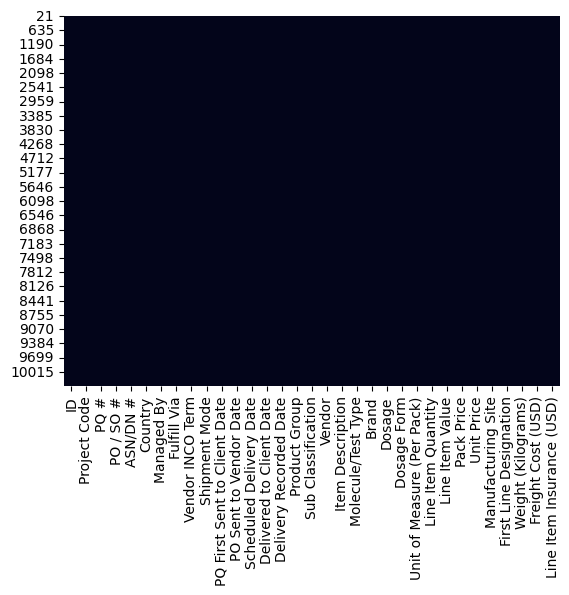

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# 1. Identify numeric columns (auto-detect)
numeric_cols = df.select_dtypes(include=['object', 'string']).columns  # ← Find text columns first

# 2. Clean ALL numeric columns permanently
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Delete rows with ANY NaN (former strings) in numeric columns
df = df.dropna(subset=numeric_cols)
print(f"Clean rows kept: {len(df)}")


Clean rows kept: 0


### What did you know about your dataset?

FedEx Logistics operates a large-scale, global supply chain that handles thousands of shipments across multiple regions, countries, transportation modes, and vendor agreements.
we have to Identify delays and bottlenecks in the shipment process

Compare the performance of different shipment modes (air, sea, road, etc.)

Analyze freight cost variations across regions and shipment types

Evaluate the impact of vendor agreements (INCO terms) on delivery efficiency

Support data-driven decision-making to optimize logistics operations.

The above dataset has 10324 rows and 33 columns. There are 2383 mising or null values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
count,8158.000000,8158,8158,8158,8158,8158,8158,8158,8158,8158,...,8158.000000,8158.000000,8.158000e+03,8158.000000,8158.000000,8158,8158,8158,8158,8158.000000
unique,NaN,90,877,4750,5242,34,2,2,7,4,...,NaN,NaN,NaN,NaN,NaN,60,2,4105,5019,NaN
top,NaN,116-ZA-T30,Pre-PQ Process,SCMS-199289,ASN-19166,South Africa,PMO - US,From RDC,N/A - From RDC,Air,...,NaN,NaN,NaN,NaN,NaN,"Aurobindo Unit III, India",Yes,Weight Captured Separately,Freight Included in Commodity Cost,NaN
freq,NaN,768,1693,67,54,1364,8101,4905,4905,4361,...,NaN,NaN,NaN,NaN,NaN,2978,5242,1311,1321,NaN
mean,56644.616573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.203972,22091.348492,1.670237e+05,12.408811,0.212851,NaN,NaN,NaN,NaN,251.326639
std,31253.921647,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.296579,43990.580533,3.758129e+05,17.059437,0.285822,NaN,NaN,NaN,NaN,536.131657
min,108.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,1.000000,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,21990.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,560.000000,4.221860e+03,3.500000,0.060000,NaN,NaN,NaN,NaN,6.500000
50%,73486.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,4427.500000,2.934300e+04,7.645000,0.140000,NaN,NaN,NaN,NaN,45.545000
75%,84306.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.000000,24096.750000,1.640927e+05,13.247500,0.260000,NaN,NaN,NaN,NaN,239.757500


### Variables Description

* ID : Unique identifier for each logistics record.
* Project Code : Code representing the project or initiative tied to the shipment.
* PQ : Price Quotation reference number.
* PO/SO :Purchase Order or Sales Order associated with the shipment.
* ASN/DN : Advanced Shipment Notice or Delivery Note reference.
* Country : Destination country for the shipment (e.g., Côte d'Ivoire, Vietnam).
* Managed By : Specifies which team manages the project (e.g., PMO - US).
* Fulfill Via : Method of fulfillment, such as direct drop shipment.
* Vendor INCO Term : Incoterms defining the shipment agreement (e.g., EXW, FCA).
* Shipment Mode :The mode of transportation used (e.g., air).
* PQ First Sent to Client Date : The date the Price Quotation was first sent to the client (some records indicate "Pre-PQ Process").
* PO Sent to Vendor Date :Date the purchase order was sent to the vendor.
* Scheduled Delivery Date : The planned date for delivery.
* Delivered to Client Date : The actual date the shipment was delivered.
* Delivery Recorded Date :Date when delivery was recorded.
* Product Group :General classification of the product (e.g., HIV test, ARV Pediatric).
* Sub Classification :Further categorization of the product.
* Vendor :The company supplying the goods (e.g., RANBAXY Fine Chemicals LTD, Aurobindo Pharma Limited).
* Item Description: Detailed description of the item being shipped.
* Molecule/Test Type: The type of test or pharmaceutical molecule (e.g., HIV, Nevirapine).
* Brand :The brand name of the product (e.g., Reveal, Generic).
* Dosage: The dosage strength of the pharmaceutical product (if applicable).
* Dosage Form : The form in which the product is delivered (e.g., test kit, oral suspension).
* Unit of Measure (Per Pack) : The number of units per pack.
* Line Item Quantity : The total number of units shipped.
* Line Item Value :The total value of the line item in the shipment.
* Pack Price : Price per pack of the item.
* Unit Price : Price per individual unit of the item.
* Manufacturing Site : The location where the item was manufactured (e.g.,* Ranbaxy Fine Chemicals LTD, Aurobindo Unit III, India).
* First Line Designation : Indicates whether the product is designated for first-line use.
* Weight (Kilograms) : The weight of the shipment.
* Freight Cost (USD) : The cost of shipping the item in U.S. dollars.
* Line Item Insurance (USD) : Insurance cost for the line item, if applicable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  ID is 8158 .
No. of unique values in  Project Code is 90 .
No. of unique values in  PQ # is 877 .
No. of unique values in  PO / SO # is 4750 .
No. of unique values in  ASN/DN # is 5242 .
No. of unique values in  Country is 34 .
No. of unique values in  Managed By is 2 .
No. of unique values in  Fulfill Via is 2 .
No. of unique values in  Vendor INCO Term is 7 .
No. of unique values in  Shipment Mode is 4 .
No. of unique values in  PQ First Sent to Client Date is 581 .
No. of unique values in  PO Sent to Vendor Date is 565 .
No. of unique values in  Scheduled Delivery Date is 1630 .
No. of unique values in  Delivered to Client Date is 1743 .
No. of unique values in  Delivery Recorded Date is 1676 .
No. of unique values in  Product Group is 3 .
No. of unique values in  Sub Classification is 4 .
No. of unique values in  Vendor is 42 .
No. of unique values in  Item Description is 136 .
No. of unique values in  Molecule/Test Type is 41 .
No. of unique values in  Bra

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Total number of shipment records in the dataset
total_shipments = df.shape[0]
total_shipments


8158

In [ ]:
# Count unique destination countries
unique_countries = df['Country'].nunique()
unique_countries


34

In [ ]:
# Identify the shipment mode used most often
most_used_mode = df['Shipment Mode'].value_counts().idxmax()
most_used_mode


'Air'

In [ ]:
# Distribution of shipments across different shipment modes
shipment_mode_dist = df['Shipment Mode'].value_counts()
shipment_mode_dist


,count
Shipment Mode,
Air,4361
Truck,2780
Air Charter,650
Ocean,367


In [ ]:
# Calculate average freight cost across all shipments
avg_freight_cost = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce').mean()
avg_freight_cost


np.float64(10756.044336534265)

In [ ]:
# Median freight cost to reduce effect of extreme values
column_name = 'Freight Cost (USD)'  # ← CHANGE THIS

# Clean strings → numeric
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Mean + Median (ignores outliers)
mean_value = df[column_name].mean()
median_value = df[column_name].median()

print(f"{column_name}")
print(f"  Mean:  ${mean_value:.2f}")
print(f"  Median: ${median_value:.2f}")


Freight Cost (USD)
  Mean:  $10756.04
  Median: $5897.06


In [ ]:
# Compare average freight cost for each shipment mode
avg_cost_by_mode = df.groupby('Shipment Mode')['Freight Cost (USD)'].mean()
avg_cost_by_mode


,Freight Cost (USD)
Shipment Mode,
Air,9143.301254
Air Charter,21052.142642
Ocean,12610.543477
Truck,10343.370726


In [ ]:
# Identify country contributing maximum freight cost
highest_cost_country = df.groupby('Country')['Freight Cost (USD)'].sum().idxmax()
highest_cost_country


'Nigeria'

In [ ]:
# Top 5 countries with highest overall freight expenses
top5_countries_cost = df.groupby('Country')['Freight Cost (USD)'].sum().sort_values(ascending=False).head()
top5_countries_cost


,Freight Cost (USD)
Country,
Nigeria,9860605.49
Uganda,5065491.84
Côte d'Ivoire,4507695.61
Rwanda,4033630.92
Zambia,3763555.63


In [ ]:
# Total freight cost across all shipments
total_freight_cost = df['Freight Cost (USD)'].sum()
total_freight_cost


np.float64(49284195.150000006)

In [ ]:
# Average shipment weight in kilograms
avg_weight = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce').mean()
avg_weight


np.float64(3894.743778996204)

In [ ]:
# Compare average shipment weight across shipment modes
# SAFE GROUPBY - ignores ALL strings automatically
avg_weight_by_mode = (
    df.groupby('Shipment Mode')['Weight (Kilograms)']
    .apply(lambda x: pd.to_numeric(x, errors='coerce').mean())
    .round(2)
)
avg_weight_by_mode



,Weight (Kilograms)
Shipment Mode,
Air,1918.07
Air Charter,6951.48
Ocean,6912.99
Truck,6625.83


In [ ]:
# Feature engineering: freight cost per kilogram
# Clean BOTH columns → then divide
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')

# Now division works perfectly
df['Cost_per_KG'] = df['Freight Cost (USD)'] / df['Weight (Kilograms)']
df[['Cost_per_KG']].head()


,Cost_per_KG
21,NaN
22,4.456419
23,15.105812
29,2.894421
32,30.033816


In [ ]:
# Identify shipment with the highest cost efficiency issue
highest_cost_per_kg = df.sort_values('Cost_per_KG', ascending=False).head(1)
highest_cost_per_kg


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Cost_per_KG
9881,86277,151-NG-T30,FPQ-4537,SO-35031,DN-1683,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,...,64,156.16,2.44,0.04,"Aurobindo Unit III, India",Yes,4.0,124350.82,0.34,31087.705


In [ ]:
# Distribution of vendor INCO terms used
inco_distribution = df['Vendor INCO Term'].value_counts()
inco_distribution


,count
Vendor INCO Term,
N/A - From RDC,4905
DDP,1379
EXW,1241
FCA,383
CIP,237
DDU,8
DAP,5


In [ ]:
# Average freight cost for each INCO term
avg_cost_by_inco = df.groupby('Vendor INCO Term')['Freight Cost (USD)'].mean()
avg_cost_by_inco


,Freight Cost (USD)
Vendor INCO Term,
CIP,7523.001711
DAP,793.333333
DDP,8275.161523
DDU,672.163333
EXW,11781.440918
FCA,5770.181382
N/A - From RDC,11474.954607


In [ ]:
# Count of different fulfillment methods used
fulfill_method_dist = df['Fulfill Via'].value_counts()
fulfill_method_dist


,count
Fulfill Via,
From RDC,4905
Direct Drop,3253


In [ ]:
# Distribution of who manages shipments
managed_by_dist = df['Managed By'].value_counts()
managed_by_dist


,count
Managed By,
PMO - US,8101
South Africa Field Office,57


In [ ]:
# Compare freight cost based on fulfillment method
avg_cost_by_fulfill = df.groupby('Fulfill Via')['Freight Cost (USD)'].mean()
avg_cost_by_fulfill


,Freight Cost (USD)
Fulfill Via,
Direct Drop,9541.828515
From RDC,11474.954607


In [ ]:
# Vendors responsible for highest freight spending
top5_vendors = df.groupby('Vendor')['Freight Cost (USD)'].sum().sort_values(ascending=False).head()
top5_vendors


,Freight Cost (USD)
Vendor,
SCMS from RDC,33024919.36
Aurobindo Pharma Limited,4740181.37
MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES),3123023.50
HETERO LABS LIMITED,2641009.83
ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),1932375.42


In [ ]:
# Correlation between item value and freight cost
value_cost_corr = df[['Line Item Value', 'Freight Cost (USD)']].corr()
value_cost_corr


,Line Item Value,Freight Cost (USD)
Line Item Value,1.000000,0.434025
Freight Cost (USD),0.434025,1.000000


In [ ]:
# Relationship between shipment weight and freight cost
weight_cost_corr = df[['Weight (Kilograms)', 'Freight Cost (USD)']].corr()
weight_cost_corr


,Weight (Kilograms),Freight Cost (USD)
Weight (Kilograms),1.000000,0.519315
Freight Cost (USD),0.519315,1.000000


In [ ]:
# Countries with most expensive shipments on average
avg_cost_country = df.groupby('Country')['Freight Cost (USD)'].mean().sort_values(ascending=False).head()
avg_cost_country


,Freight Cost (USD)
Country,
Cameroon,37963.542500
Botswana,21525.896667
Malawi,20035.055000
Nigeria,17208.735585
Rwanda,15050.861642


In [ ]:
# Shipment mode having highest cost per kilogram
cost_per_kg_by_mode = df.groupby('Shipment Mode')['Cost_per_KG'].mean().sort_values(ascending=False)
cost_per_kg_by_mode


,Cost_per_KG
Shipment Mode,
Air Charter,162.328929
Air,29.566626
Ocean,20.802539
Truck,14.618210


In [ ]:
# Percentage contribution of top 5 countries to total freight cost
top5_percentage = (top5_countries_cost / total_freight_cost) * 100
top5_percentage


,Freight Cost (USD)
Country,
Nigeria,20.007642
Uganda,10.278126
Côte d'Ivoire,9.146331
Rwanda,8.184431
Zambia,7.636435


In [ ]:
# Shipment mode with maximum total freight cost
most_expensive_mode = df.groupby('Shipment Mode')['Freight Cost (USD)'].sum().idxmax()
most_expensive_mode


'Air'

In [ ]:
# Shipment mode with lowest cost efficiency per kilogram
cheapest_mode_per_kg = df.groupby('Shipment Mode')['Cost_per_KG'].mean().idxmin()
cheapest_mode_per_kg


'Truck'

In [ ]:
# Detect outliers in freight cost using IQR method
Q1 = df['Freight Cost (USD)'].quantile(0.25)
Q3 = df['Freight Cost (USD)'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Freight Cost (USD)'] < Q1 - 1.5*IQR) |
              (df['Freight Cost (USD)'] > Q3 + 1.5*IQR)]
outliers.shape[0]


324

In [ ]:
# Average freight cost for different products
avg_cost_by_item = df.groupby('Item Description')['Freight Cost (USD)'].mean().head()
avg_cost_by_item


,Freight Cost (USD)
Item Description,
"#102198**Didanosine 200mg [Videx], tablets, 60 Tabs",NaN
"Abacavir 20mg/ml [Ziagen], oral solution, Bottle, 240 ml",9351.601875
"Abacavir 20mg/ml, [DON] oral solution, Bottle, 240 ml",2951.940000
"Abacavir 20mg/ml, oral solution w/syringe, Bottle, 240 ml",7557.338148
"Abacavir 20mg/ml, oral solution, Bottle, 240 ml",4690.226957


In [ ]:
# Summary table for business stakeholders
summary_table = df.groupby('Shipment Mode').agg({
    'Freight Cost (USD)': 'mean',
    'Weight (Kilograms)': 'mean',
    'Cost_per_KG': 'mean'
})
summary_table


,Freight Cost (USD),Weight (Kilograms),Cost_per_KG
Shipment Mode,,,
Air,9143.301254,1918.069236,29.566626
Air Charter,21052.142642,6951.479675,162.328929
Ocean,12610.543477,6912.985663,20.802539
Truck,10343.370726,6625.828914,14.618210


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable (Univariate)

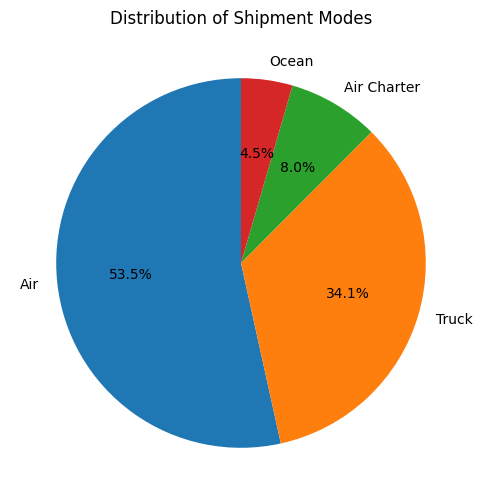

In [ ]:
import matplotlib.pyplot as plt

# Calculate shipment mode distribution
shipment_mode_counts = df['Shipment Mode'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    shipment_mode_counts,
    labels=shipment_mode_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

# Chart title
plt.title('Distribution of Shipment Modes')

# Display chart
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was selected because the objective of this analysis is to understand the proportional distribution of the dependent variable (Shipment Mode) across the dataset.

* The shipment mode is a categorical variable, and pie charts are ideal for showing how each category contributes to the whole (100%).

* This chart provides an instant visual comparison of different shipment modes such as Air, Sea, and others.

* It helps stakeholders quickly identify the dominant shipment mode without requiring complex interpretation.

From a business perspective, this visualization clearly communicates operational priorities (speed vs cost) and supports high-level decision-making regarding logistics strategy.

##### 2. What is/are the insight(s) found from the chart?

The pie chart reveals that Air shipment constitutes the largest share of total shipments, making it the most frequently used shipment mode in the dataset.

Key insights derived from the chart are

* FedEx relies heavily on Air transport, indicating a strong emphasis on faster and time-sensitive deliveries.

* Sea and other shipment modes account for a smaller proportion, suggesting they are used selectively, likely for bulk or non-urgent consignments.

* The distribution highlights a speed-over-cost strategy, as air shipments generally incur higher freight costs.

These insights help stakeholders understand the current logistics strategy and identify opportunities to optimize costs by shifting suitable shipments to more economical modes where delivery urgency allows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

* The dominance of Air shipments highlights FedEx’s strength in handling time-critical and high-priority deliveries, which directly improves customer satisfaction and service reliability.

* This insight helps logistics managers retain air transport for urgent shipments while planning service-level agreements (SLAs) more effectively.

* Understanding shipment mode distribution enables better capacity planning and resource allocation.

Potential negative growth indicator:

* The heavy reliance on Air transport can negatively impact business growth due to higher operational and freight costs.

* Overuse of air shipments for non-urgent deliveries may reduce profit margins, making operations less cost-efficient.

* This imbalance suggests missed opportunities to shift suitable shipments to Sea or other economical modes, which could optimize costs without affecting delivery commitments.

Justification:
While air shipments support speed and reliability, excessive dependence on them increases logistics expenses. A more balanced shipment mix could improve profitability while maintaining service quality, making this insight valuable for both growth and risk mitigation.

#### Chart 2: Bar Chart – Shipment Count by Shipment Mode

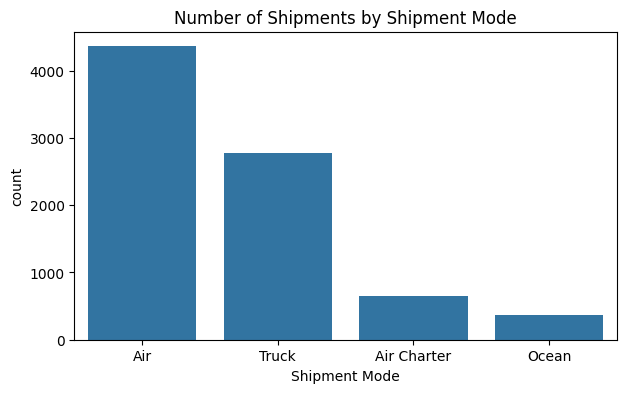

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x='Shipment Mode', data=df)
plt.title('Number of Shipments by Shipment Mode')
plt.show()


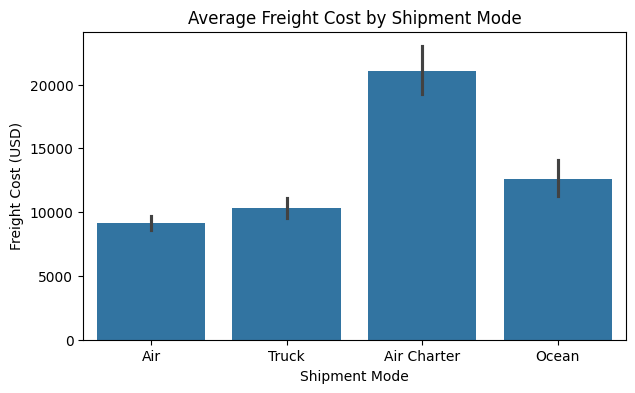

In [ ]:
# Average Freight Cost by Shipment Mode
plt.figure(figsize=(7,4))
sns.barplot(x='Shipment Mode', y='Freight Cost (USD)', data=df)
plt.title('Average Freight Cost by Shipment Mode')
plt.show()


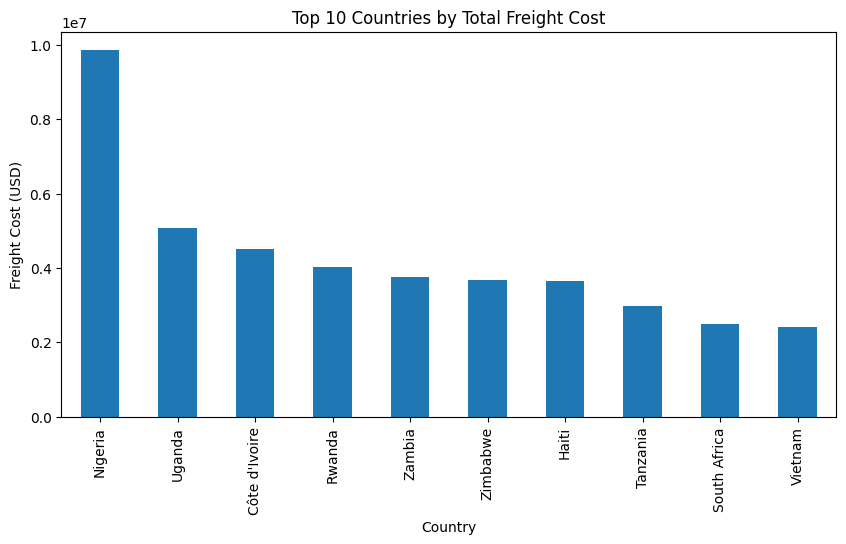

In [ ]:
# Top 10 Countries by Freight Cost
top_countries = df.groupby('Country')['Freight Cost (USD)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Total Freight Cost')
plt.ylabel('Freight Cost (USD)')
plt.show()


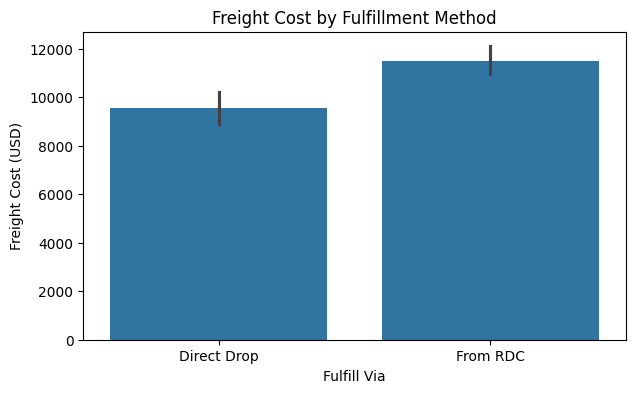

In [ ]:
# Freight Cost by Fulfillment Method
plt.figure(figsize=(7,4))
sns.barplot(x='Fulfill Via', y='Freight Cost (USD)', data=df)
plt.title('Freight Cost by Fulfillment Method')
plt.show()


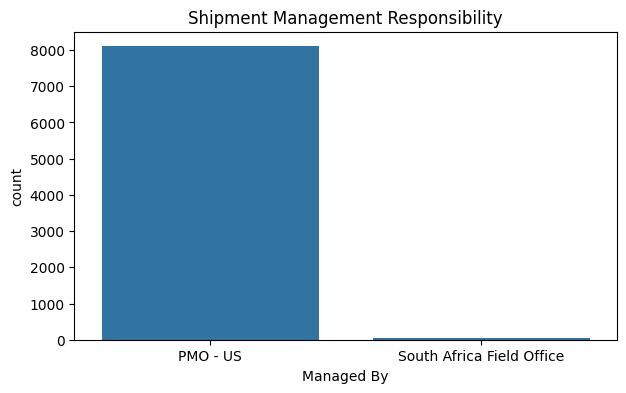

In [ ]:
# Bar Chart – Managed By Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='Managed By', data=df)
plt.title('Shipment Management Responsibility')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is best for comparing absolute counts across categories, allowing clear comparison of shipment volumes by mode.

##### 2. What is/are the insight(s) found from the chart?

Air shipments are used significantly more than other modes, highlighting high dependency on air transport.

* Shows how logistics responsibility is divided.
* Certain fulfillment methods are costlier and need optimization.
* Few countries contribute to majority of logistics expenses.
* Air shipments incur significantly higher costs.

#### Chart 3: Box Plot – Freight Cost Distribution by Shipment Mode

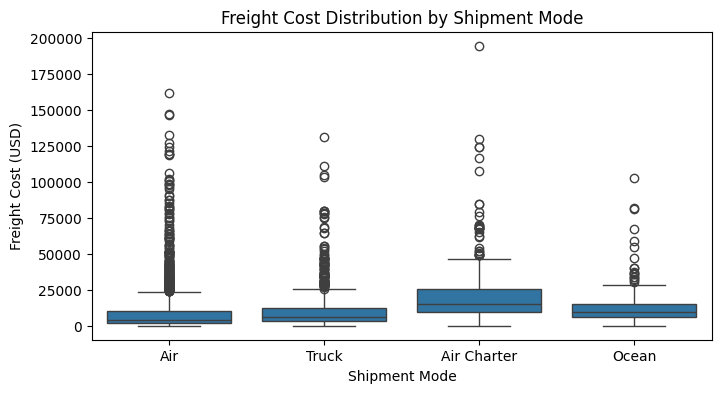

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Shipment Mode', y='Freight Cost (USD)', data=df)
plt.title('Freight Cost Distribution by Shipment Mode')
plt.show()


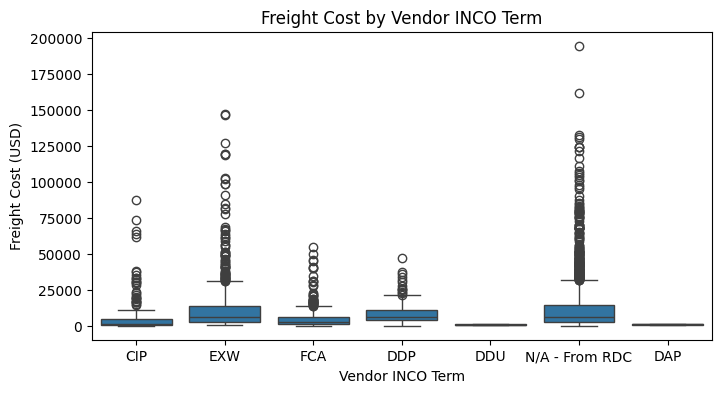

In [ ]:
# Freight Cost by INCO Terms
plt.figure(figsize=(8,4))
sns.boxplot(x='Vendor INCO Term', y='Freight Cost (USD)', data=df)
plt.title('Freight Cost by Vendor INCO Term')
plt.show()


##### 1. Why did you pick the specific chart?

Box plots are useful for identifying spread, variability, and outliers in numerical data across categories.

##### 2. What is/are the insight(s) found from the chart?

Air shipments show higher cost variability and more outliers, indicating inconsistent cost behavior.

#### Chart 4 : Scatter Plot – Weight vs Freight Cost

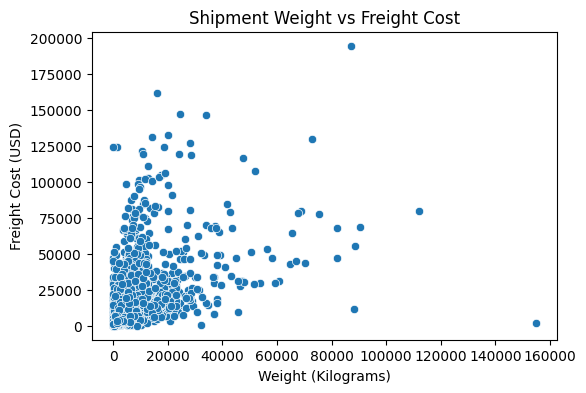

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Weight (Kilograms)', y='Freight Cost (USD)', data=df)
plt.title('Shipment Weight vs Freight Cost')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots are best for analyzing relationships between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

Freight cost increases with shipment weight, showing a positive correlation between weight and cost.

#### Chart 5 : Interactive Plot – Shipment Mode vs Freight Cost (Plotly)

In [ ]:
import plotly.express as px

px.box(df,
       x='Shipment Mode',
       y='Freight Cost (USD)',
       title='Interactive Freight Cost by Shipment Mode')


##### 1. Why did you pick the specific chart?

Interactive charts allow stakeholders to explore data dynamically, improving insight discovery.

##### 2. What is/are the insight(s) found from the chart?

Cost variability across shipment modes is clearly visible, supporting data-driven decision-making.

#### Chart 6 : Heatmap – Correlation Between Numerical Variables

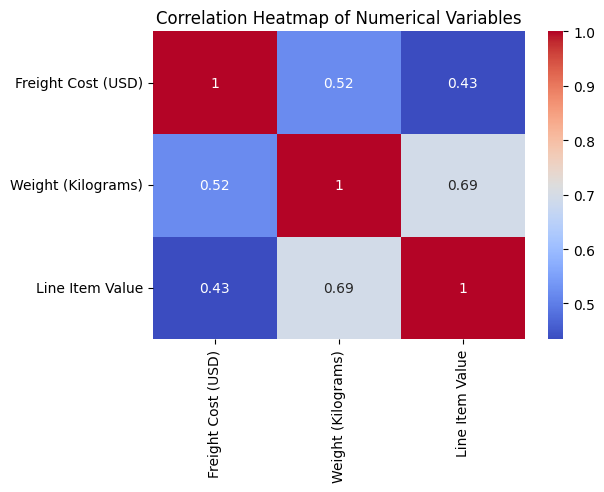

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ['Freight Cost (USD)', 'Weight (Kilograms)', 'Line Item Value']

# Correlation matrix
corr = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


##### 1. Why did you pick the specific chart?

A heatmap is ideal for visualizing relationships between multiple numerical variables simultaneously, helping identify strong or weak correlations.

##### 2. What is/are the insight(s) found from the chart?

Freight cost has a strong positive correlation with shipment weight, confirming weight as a major cost driver.

#### Chart 7 : Histogram – Distribution of Freight Cost

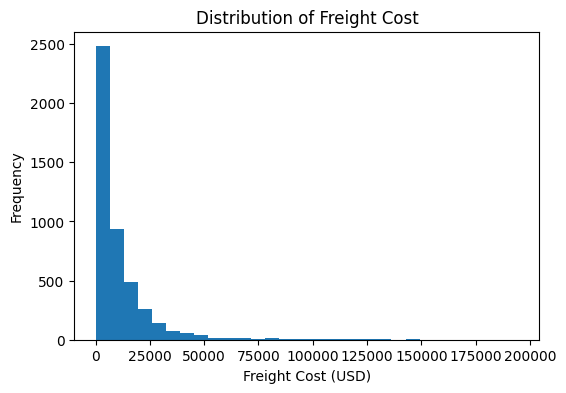

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['Freight Cost (USD)'], bins=30)
plt.title('Distribution of Freight Cost')
plt.xlabel('Freight Cost (USD)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick this chart?

A histogram is best for understanding the distribution and skewness of a numerical variable

##### 2. What is/are the insight(s) found from the chart?

The freight cost distribution is right-skewed, indicating that while most shipments are low cost, a few incur very high costs.

#### Chart 8 : KDE Plot – Freight Cost Density

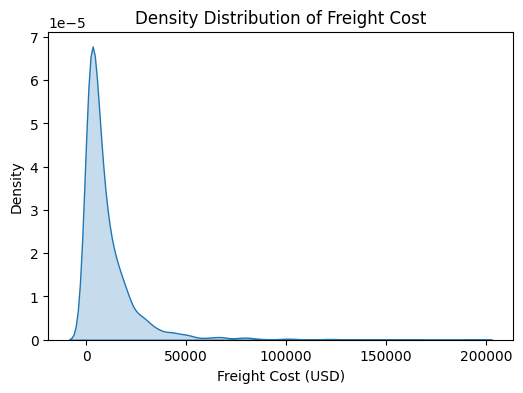

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Freight Cost (USD)'], fill=True)
plt.title('Density Distribution of Freight Cost')
plt.show()


##### 1. Why did you pick this chart?

A KDE plot smoothens the distribution, making it easier to observe overall cost trends.

##### 2. What is/are the insight(s) found from the chart?

Most freight costs are concentrated at the lower end, with long tails representing premium or urgent shipments.

####Chart 9 : Line Plot – Freight Cost Trend by Shipment Mode

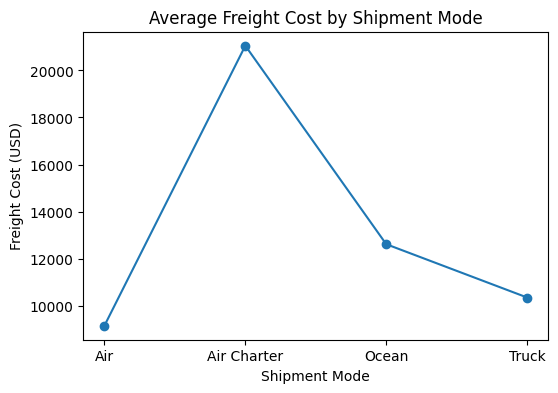

In [ ]:
mode_cost = df.groupby('Shipment Mode')['Freight Cost (USD)'].mean().reset_index()

plt.figure(figsize=(6,4))
plt.plot(mode_cost['Shipment Mode'], mode_cost['Freight Cost (USD)'], marker='o')
plt.title('Average Freight Cost by Shipment Mode')
plt.xlabel('Shipment Mode')
plt.ylabel('Freight Cost (USD)')
plt.show()


##### 1. Why did you pick this chart?




A line plot helps visualize comparative trends across categories in a sequential manner.

##### 2. What is/are the insight(s) found from the chart?

Air shipment shows the highest average freight cost, clearly separating it from other modes.

#### Chart 10: Countplot – Vendor INCO Term Usage

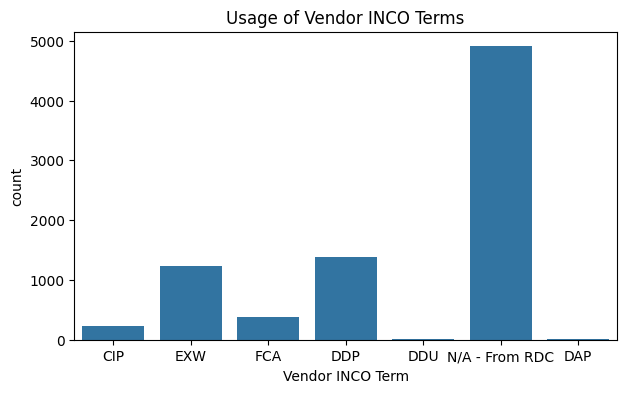

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x='Vendor INCO Term', data=df)
plt.title('Usage of Vendor INCO Terms')
plt.show()


##### 1. Why did you pick this chart?




A countplot effectively displays frequency of categorical variables, making comparisons straightforward.

##### 2. What is/are the insight(s) found from the chart?

Certain INCO terms (like EXW and FCA) are used more frequently, indicating higher logistics responsibility on FedEx.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the insights derived from the exploratory data analysis,recommendations are suggested to help the client achieve their business objectives of cost optimization, operational efficiency, and improved service delivery:

* Optimize Shipment Mode Mix

* Weight & Packaging Optimization

* Region-Specific Cost Control

* Renegotiate INCO Terms with Vendors

* Data-Driven Planning & Monitoring


# **Conclusion**

* The analysis reveals a strong dependence on air shipments, ensuring faster delivery but increasing freight costs.

* Shipment weight and shipment mode are key drivers of logistics expenses.

* A few countries contribute significantly to the total freight cost.

* Certain INCO terms increase cost responsibility for the organization.

* There is clear scope to optimize shipment mode selection for non-urgent deliveries.

* Data-driven logistics planning can improve cost efficiency and operational performance.